#Bibliotecas

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Download dos dados

ZS=F (Soybean Futures,Mar-2024)

ZL=F (Soybean Oil Futures,Mar-2024)

CL=F (Crude Oil Feb 24)

In [3]:
lista_acoes = ['ZS=F', 'ZL=F', 'CL=F']
data_inicial = '2000-01-01'
data_final = '2024-01-15'

In [4]:
yf.download(lista_acoes, start=data_inicial,end=data_final)

[*********************100%%**********************]  3 of 3 completed


Price       Adj Close                          Close                      \
Ticker           CL=F       ZL=F     ZS=F       CL=F       ZL=F     ZS=F   
Date                                                                       
2000-03-15        NaN  16.850000      NaN        NaN  16.850000      NaN   
2000-03-16        NaN  16.940001      NaN        NaN  16.940001      NaN   
2000-03-17        NaN  17.850000      NaN        NaN  17.850000      NaN   
2000-03-20        NaN  17.459999      NaN        NaN  17.459999      NaN   
2000-03-21        NaN  17.270000      NaN        NaN  17.270000      NaN   
...               ...        ...      ...        ...        ...      ...   
2024-01-08  70.769997  47.439999  1239.50  70.769997  47.439999  1239.50   
2024-01-09  72.239998  48.119999  1241.50  72.239998  48.119999  1241.50   
2024-01-10  71.370003  47.860001  1228.75  71.370003  47.860001  1228.75   
2024-01-11  72.019997  48.369999  1231.25  72.019997  48.369999  1231.25   
2024-01-12  72.680000  47.750000  1205.75  72.680000  47.750000  1205.75   

Price            High                            Low                      \
Ticker           CL=F       ZL=F     ZS=F       CL=F       ZL=F     ZS=F   
Date                                                                       
2000-03-15        NaN  17.129999      NaN        NaN  16.809999      NaN   
2000-03-16        NaN  17.219999      NaN        NaN  16.639999      NaN   
2000-03-17        NaN  17.900000      NaN        NaN  17.000000      NaN   
2000-03-20        NaN  17.600000      NaN        NaN  17.260000      NaN   
2000-03-21        NaN  17.459999      NaN        NaN  17.219999      NaN   
...               ...        ...      ...        ...        ...      ...   
2024-01-08  73.949997  47.439999  1252.75  70.129997  46.360001  1233.25   
2024-01-09  72.930000  48.299999  1243.00  70.470001  48.119999  1228.75   
2024-01-10  73.589996  47.919998  1241.50  71.010002  47.860001  1228.75   
2024-01-11  73.809998  48.369999  1235.50  71.169998  48.369999  1231.25   
2024-01-12  75.250000  47.750000  1240.25  72.360001  47.750000  1205.75   

Price            Open                        Volume                     
Ticker           CL=F       ZL=F     ZS=F      CL=F     ZL=F      ZS=F  
Date                                                                    
2000-03-15        NaN  17.049999      NaN       NaN  11147.0       NaN  
2000-03-16        NaN  16.790001      NaN       NaN  12610.0       NaN  
2000-03-17        NaN  17.100000      NaN       NaN  24579.0       NaN  
2000-03-20        NaN  17.500000      NaN       NaN  10960.0       NaN  
2000-03-21        NaN  17.430000      NaN       NaN   8102.0       NaN  
...               ...        ...      ...       ...      ...       ...  
2024-01-08  73.510002  46.360001  1252.75  392249.0    161.0     255.0  
2024-01-09  70.910004  48.230000  1238.50  363445.0    142.0     158.0  
2024-01-10  72.169998  47.919998  1241.50  352772.0     34.0     307.0  
2024-01-11  71.330002  48.369999  1234.00  373645.0     10.0     220.0  
2024-01-12  73.010002  47.750000  1239.75  403636.0  95524.0  237245.0  

[6004 rows x 18 columns]

#Calculo de retornos e correlações

[*********************100%%**********************]  3 of 3 completed


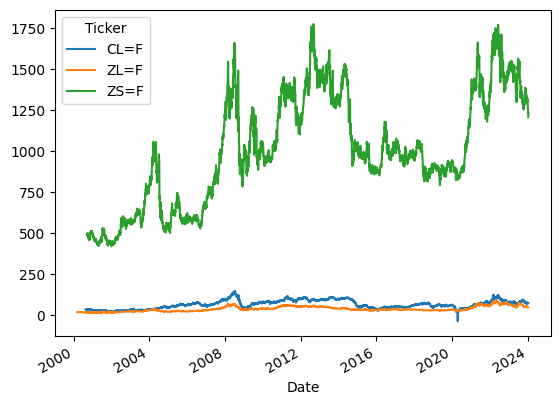

In [5]:
precos_df = yf.download(lista_acoes, start=data_inicial,end=data_final)['Adj Close']
precos_df.plot();

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8780\3785043492.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_df = precos_df.pct_change().dropna()


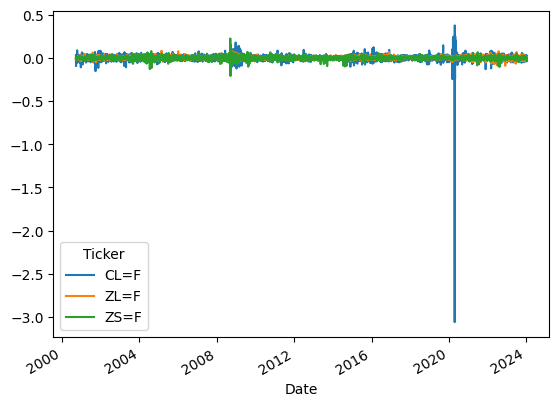

In [6]:
retornos_df = precos_df.pct_change().dropna()
retornos_df.plot();

O valor do investimento em um dado período $T$ vai ser igual a

$P_T = P_0\prod_{t=1}^T(1+R_t) = P_0(1+R_1)\times(1+R_2)\times...\times(1+R_T)$

sendo $P_0$ o valor inicial.

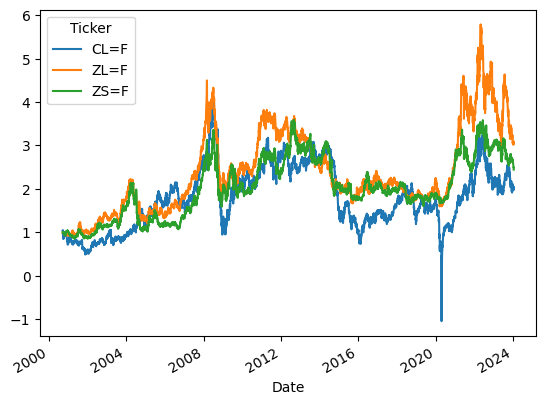

In [7]:
ret_acm = (1+retornos_df).cumprod()
ret_acm.plot();

In [8]:
ret_acm.corr()

Ticker,CL=F,ZL=F,ZS=F
Ticker,,,
CL=F,1.000000,0.768991,0.76624
ZL=F,0.768991,1.000000,0.91857
ZS=F,0.766240,0.918570,1.00000


In [9]:
ret_acm

Ticker,CL=F,ZL=F,ZS=F
Date,,,
2000-09-18,1.028731,1.000000,0.980253
2000-09-19,1.018131,1.000000,0.980759
2000-09-20,1.046025,0.975719,0.978734
2000-09-21,0.947001,0.981470,0.985316
2000-09-22,0.910739,0.981470,0.994430
...,...,...,...
2024-01-08,1.974059,3.031310,2.510380
2024-01-09,2.015063,3.074760,2.514430
2024-01-10,1.990795,3.058147,2.488608


#Decomposição das séries temporais

In [10]:
def plot_picos_acf_pacf(data):
    # Calcular a função de autocorrelação
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # Plotar a função de autocorrelação (ACF)
    plot_acf(data, lags=300, ax=ax[0])
    ax[0].set_title('Função de Autocorrelação')

    # Plotar a função de autocorrelação parcial (PACF)
    plot_pacf(data, lags=300, ax=ax[1])
    ax[1].set_title('Função de Autocorrelação Parcial')
    plt.show()

    # Calcular os valores da autocorrelação e os intervalos de confiança
    acf_values = ax[0].lines[0].get_ydata()
    conf_intervals = np.concatenate([path.vertices[:, 1] for path in ax[0].collections[1].get_paths()])

    # Identificar picos na ACF
    acf_peaks = np.where(acf_values > conf_intervals)[0]
    print("Picos na ACF:", acf_peaks)

    # Identificar picos na PACF
    pacf_values, _ = ax[1].lines[0].get_ydata(), ax[1].collections[1].get_segments()[0][:, 1]
    pacf_peaks = np.where(pacf_values > 0.1)[0]  # Ajuste o limiar conforme necessário
    print("Picos na PACF:", pacf_peaks)


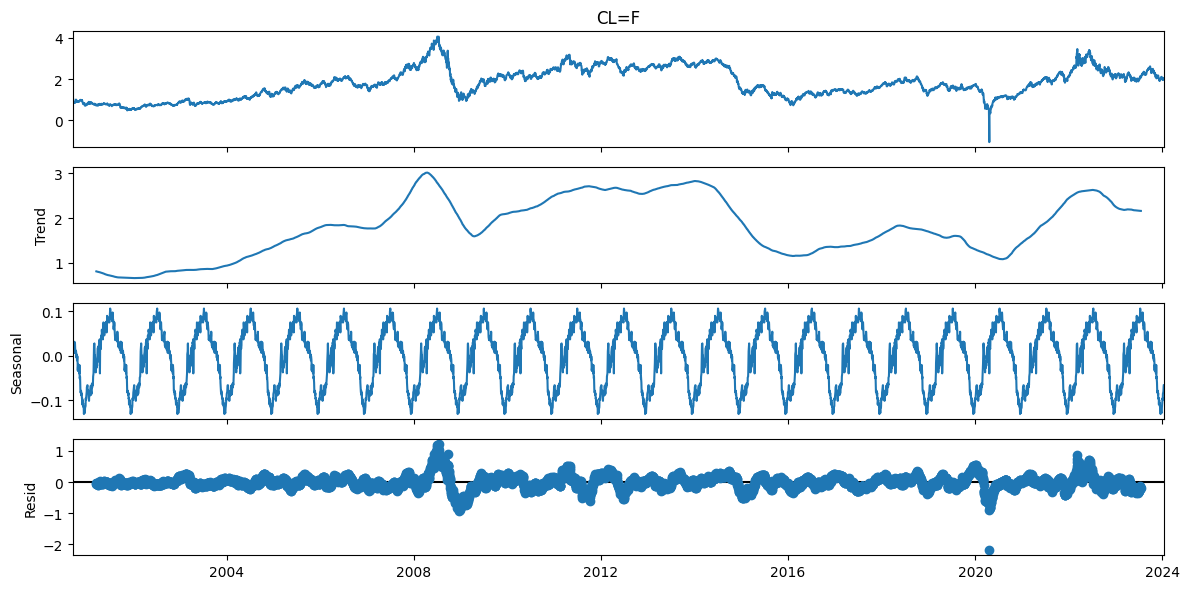

In [11]:
decomp_CL = seasonal_decompose(ret_acm['CL=F'], model='additive', period=252)
fig = decomp_CL.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

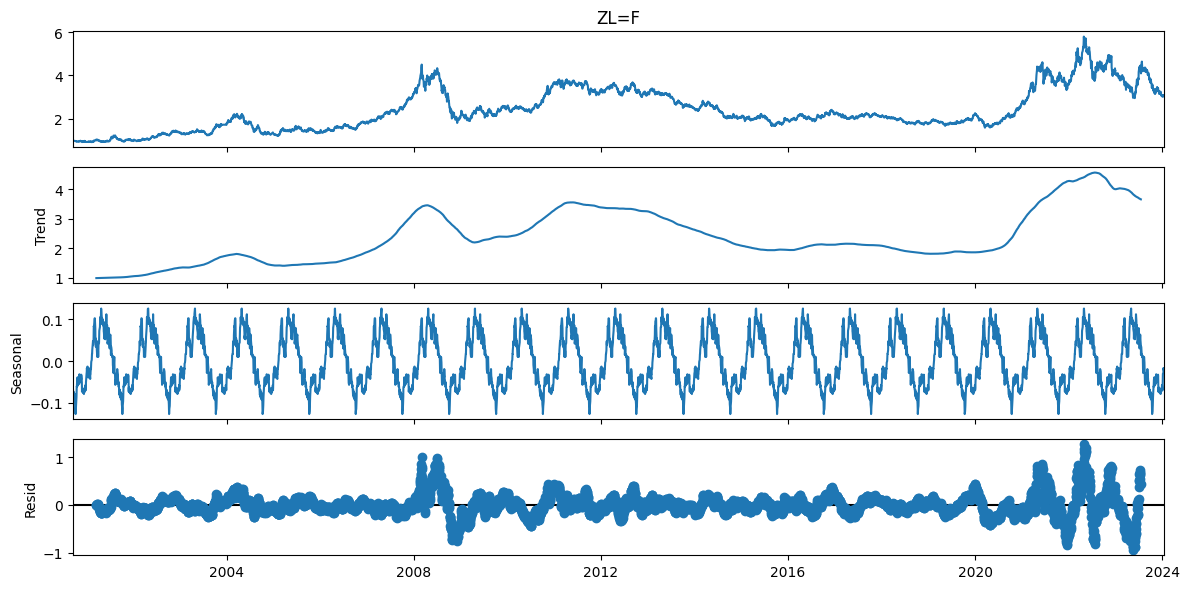

In [12]:
decomp_ZL = seasonal_decompose(ret_acm['ZL=F'], model='additive',period=252)
fig = decomp_ZL.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

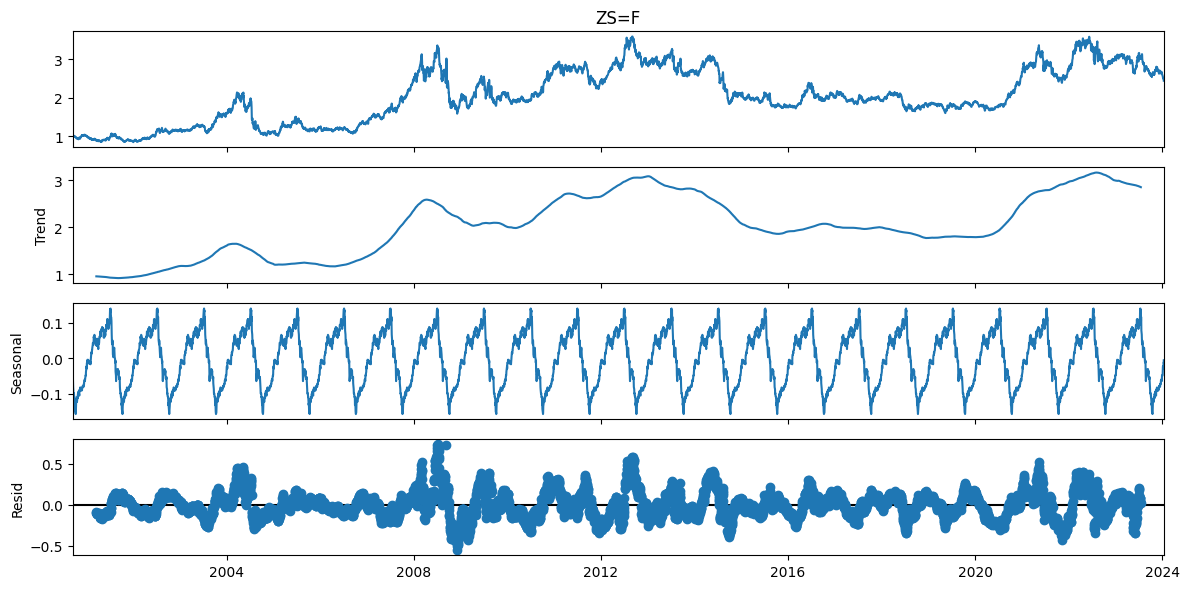

In [13]:
decomp_ZS = seasonal_decompose(ret_acm['ZS=F'], model='additive',period=252)
fig = decomp_ZS.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

In [14]:
seasonal_decompose(retornos_df, model='additive', period=252)

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [ ]:
# Função para remover tendência das séries
def remove_trend(serie, tipo):
  if tipo == 1:
    decomp = seasonal_decompose(serie, model='additive',period=252)
    result = decomp.seasonal + decomp.resid
  elif tipo == 2:
    decomp = seasonal_decompose(serie, model='multiplicative',period=252)
    result = decomp.seasonal * decomp.resid
  else:
    print("Tipo inválido")
  return result


<Axes: xlabel='Date'>

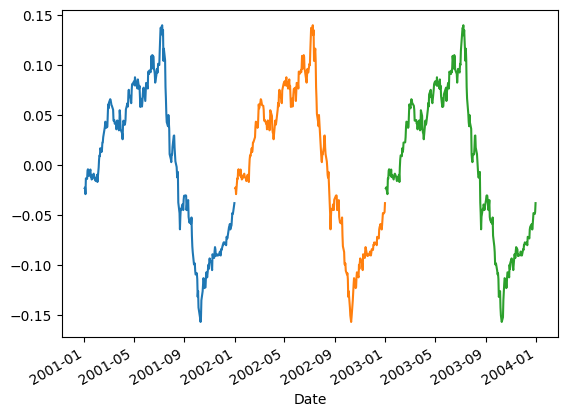

In [ ]:
decomp_ZS.seasonal['2001-01-01':'2002-01-01'].plot()
decomp_ZS.seasonal['2002-01-01':'2003-01-01'].plot()
decomp_ZS.seasonal['2003-01-01':'2004-01-01'].plot()

#Métodos de quantificação da sincronização

## Sincronização de fases

In [ ]:
from scipy.signal import hilbert

In [ ]:
ret_acm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5875 entries, 2000-09-18 to 2024-01-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    5875 non-null   float64
 1   ZL=F    5875 non-null   float64
 2   ZS=F    5875 non-null   float64
dtypes: float64(3)
memory usage: 183.6 KB


Cálculo do parâmetro de ordem

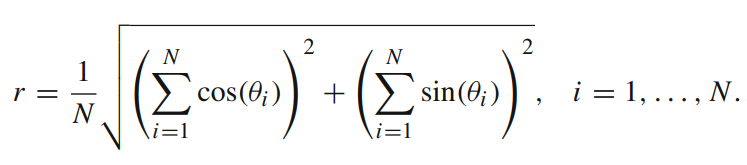

In [ ]:
def fases_hilbert_transform(time_series):
  ang = np.angle(hilbert(time_series, axis=0))
  return np.mod(ang, 2*np.pi) #retorna ângulo entre 0 e 2pi

In [ ]:
N = len(ret_acm.columns)
theta_t = fases_hilbert_transform(ret_acm)
#theta_t = fases_hilbert_transform(retornos_df)
r = np.sqrt( np.sum(np.cos(theta_t), axis=1)**2 + np.sum(np.sin(theta_t), axis=1)**2 ) / N

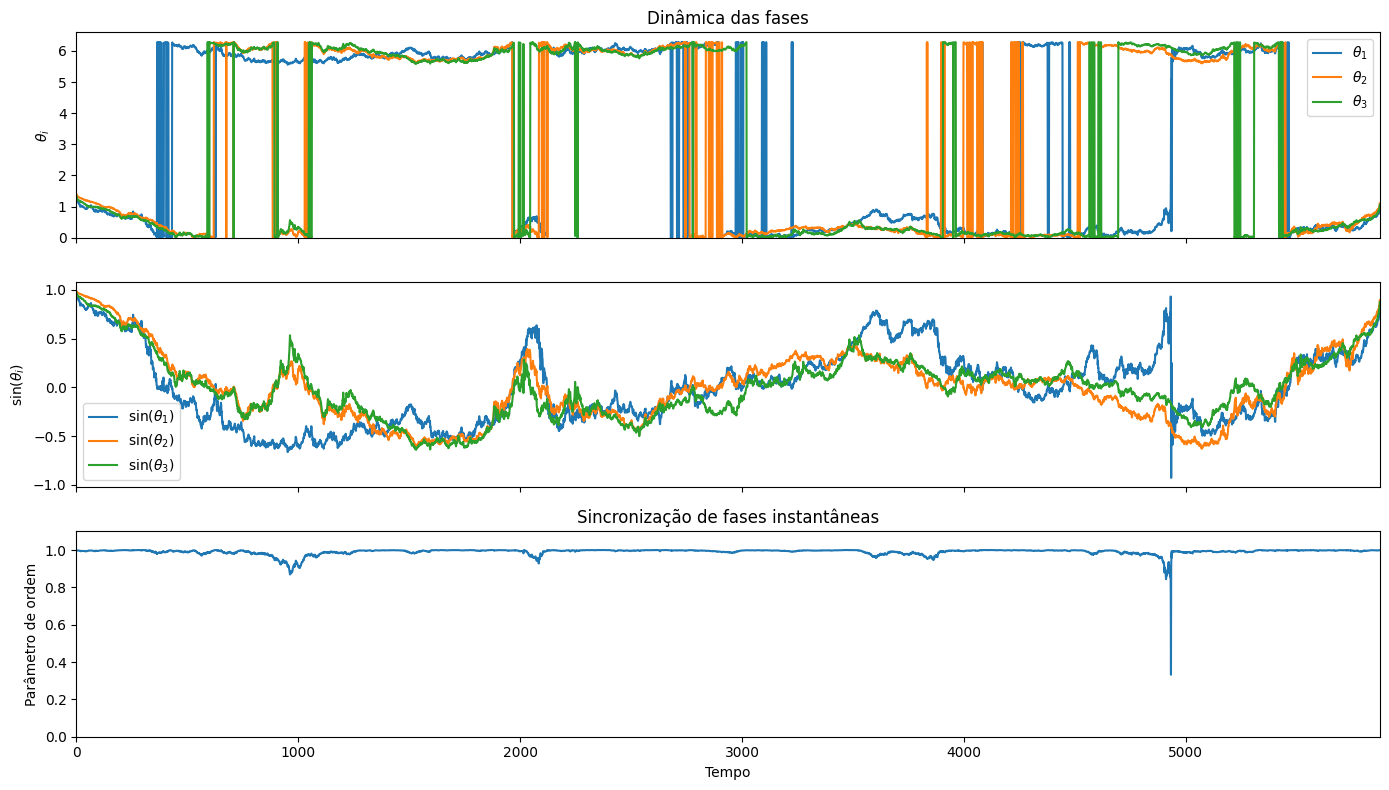

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(14,8), sharex=True)
ax[0].set(ylim=[0,2.1*np.pi], ylabel=r'$\theta_i$',title='Dinâmica das fases')
for i in range(0,N):
  ax[0].plot(theta_t[:, i], label=r'$\theta_{%d}$' % (i+1))
  ax[0].legend()

ax[1].set(ylabel=r'$\sin(\theta_i)$')
for i in range(0,N):
  ax[1].plot(np.sin(theta_t[:, i]), label=r'$\sin(\theta_{%d})$' % (i+1))
  ax[1].legend()

ax[2].set(ylim=[0,1.1],xlim=[0,len(r)],title='Sincronização de fases instantâneas',xlabel='Tempo',ylabel='Parâmetro de ordem')
ax[2].plot(r)
plt.tight_layout()
plt.show()